In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [3]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [4]:
#Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lats_lngs=zip(lats,lngs)
lats_lngs

In [5]:
#Add the latitudes and longitudes to a list.
coordinates=list(lats_lngs)

In [6]:
#Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-61.17784798149057 141.24820670503982
-20.193431137571878 34.99847558870201
-17.58540339407709 93.88739904107558
-52.14712615154231 -18.14712471195699
77.45790304018729 -58.85764415581522
-88.64152243019343 -158.08048613280926
82.65539865074498 -6.603399159432001
-5.438287474510517 107.56006177349394
88.87582746957568 -174.64267552785344
78.048155672007 -118.51809259974968
-73.36892869694543 -178.40160330046263
21.16796312049493 155.03336550499301
-12.596917334113442 -175.8929444950168
62.97060753848584 81.04264145000428
7.2327502779261295 113.06697710516227
77.36081211515236 -70.02743605275975
-1.2892906536328326 -170.50586372477932
-35.226002404090806 88.54523153286101
56.38745462298698 -54.84815002046858
22.157831787443456 -39.12092295407473
-27.13310878878142 -101.07369425935501
-34.307155674807895 175.69354816108637
59.710057657991996 14.039674244402192
44.11307823098329 115.0503466847735
49.48964806921117 -19.331040321317317
-76.61200421305267 27.5403440019098
25.81379681582085 -

55.87023544048475 125.7507810661437
-80.58775552156365 80.23258768108673
8.748385483628056 -133.4872863159914
11.192925908481683 33.29217439544169
-57.011437887102126 137.00170967345804
-31.953012725377206 -132.28162788559692
44.31386000057873 -136.96123885870256
77.12359716307947 23.064636637389583
51.59288787951047 53.01155554593649
13.912371937544151 -163.37751038115778
-31.851525960089234 -23.06792101172948
-39.58724657560181 117.66207400187051
-19.498655836659353 -22.978253287481806
38.53620846502969 76.88509377432274
-77.01058915104349 122.68381639516468
52.74272281938235 90.54858990398054
35.708481558140846 -86.56332565287993
7.452525562956907 128.8971971150006
18.573201383717716 129.6806226157936
-7.708005217491433 -105.56430156961896
9.446237354507218 -56.00240076668361
-79.04495994512152 49.6569257154149
-48.43259932573083 -108.21919063670475
78.25603241758031 -43.78585272992095
-42.22477187774556 -33.82756584587449
42.151791575439916 46.80415678297712
16.34230215756871 35.96

In [7]:
from citipy import citipy

In [8]:
#Create a list for holding the cities.
cities=[]

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count.
len(cities)

609

In [9]:
#Starting URL for Weather Map API Call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

In [18]:
#Create an empty list to hold the weather data.
city_data=[]

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count=1
set_count=1

#Loop through all the cities in the list.
for i,city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if(i%50==0 and i>=50):
        set_count +=1
        record_count=1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url=url+"&q="+city.replace(" ","+")
    
    #Log the URL, record, and set number and the city.
    print(f"Processing Record {record_count} of Set {set_count}|{city}")
    
    #Add 1 to the record count.
    record_count+=1
    
#Run an API request for each of the cities.
    try:
        
        #Parse the JSON and retrieve data.
        city_weather=requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1|hobart
Processing Record 2 of Set 1|beira
Processing Record 3 of Set 1|bengkulu
Processing Record 4 of Set 1|arraial do cabo
Processing Record 5 of Set 1|upernavik
Processing Record 6 of Set 1|mataura
Processing Record 7 of Set 1|illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1|tambun
Processing Record 9 of Set 1|mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1|norman wells
Processing Record 11 of Set 1|vaini
Processing Record 12 of Set 1|katsuura
Processing Record 13 of Set 1|vaitupu
City not found. Skipping...
Processing Record 14 of Set 1|krasnoselkup
Processing Record 15 of Set 1|labuan
Processing Record 16 of Set 1|qaanaaq
Processing Record 17 of Set 1|saleaula
City not found. Skipping...
Processing Record 18 of Set 1|busselton
Processing Record 19 of Set 1|saint anthony
Processing Record 20 of Set 1|ponta do sol
Processing Record 21 of Set 1|pisco

Processing Record 43 of Set 4|bachaquero
Processing Record 44 of Set 4|berlevag
Processing Record 45 of Set 4|kayerkan
Processing Record 46 of Set 4|praia da vitoria
Processing Record 47 of Set 4|manzil salim
Processing Record 48 of Set 4|ocampo
Processing Record 49 of Set 4|sataua
City not found. Skipping...
Processing Record 50 of Set 4|akdepe
Processing Record 1 of Set 5|borzya
Processing Record 2 of Set 5|shaunavon
Processing Record 3 of Set 5|coihaique
Processing Record 4 of Set 5|petropavlovsk-kamchatskiy
Processing Record 5 of Set 5|berbera
Processing Record 6 of Set 5|katobu
Processing Record 7 of Set 5|mahebourg
Processing Record 8 of Set 5|issoire
Processing Record 9 of Set 5|hashtrud
Processing Record 10 of Set 5|carballo
Processing Record 11 of Set 5|severo-kurilsk
Processing Record 12 of Set 5|mokhsogollokh
Processing Record 13 of Set 5|murwillumbah
Processing Record 14 of Set 5|kapoeta
Processing Record 15 of Set 5|siderno
Processing Record 16 of Set 5|chokurdakh
Processi

Processing Record 41 of Set 8|salmas
Processing Record 42 of Set 8|shenjiamen
Processing Record 43 of Set 8|banjarmasin
Processing Record 44 of Set 8|san andres
Processing Record 45 of Set 8|okitipupa
Processing Record 46 of Set 8|mao
Processing Record 47 of Set 8|manaure
Processing Record 48 of Set 8|akhalgori
Processing Record 49 of Set 8|olafsvik
Processing Record 50 of Set 8|fort saint john
City not found. Skipping...
Processing Record 1 of Set 9|fortuna
Processing Record 2 of Set 9|hermosillo
Processing Record 3 of Set 9|sola
Processing Record 4 of Set 9|salalah
Processing Record 5 of Set 9|constitucion
Processing Record 6 of Set 9|batemans bay
Processing Record 7 of Set 9|talavera
Processing Record 8 of Set 9|krasnogorskoye
Processing Record 9 of Set 9|verkhnevilyuysk
Processing Record 10 of Set 9|kendari
Processing Record 11 of Set 9|coquimbo
Processing Record 12 of Set 9|mattawa
Processing Record 13 of Set 9|high level
Processing Record 14 of Set 9|warri
Processing Record 15 of

Processing Record 39 of Set 12|kawana waters
City not found. Skipping...
Processing Record 40 of Set 12|karratha
Processing Record 41 of Set 12|toamasina
Processing Record 42 of Set 12|kaifeng
Processing Record 43 of Set 12|panipat
Processing Record 44 of Set 12|skibbereen
Processing Record 45 of Set 12|aflu
City not found. Skipping...
Processing Record 46 of Set 12|mwene-ditu
Processing Record 47 of Set 12|ishigaki
Processing Record 48 of Set 12|tunduru
City not found. Skipping...
Processing Record 49 of Set 12|takoradi
Processing Record 50 of Set 12|canico
Processing Record 1 of Set 13|juigalpa
Processing Record 2 of Set 13|snyder
Processing Record 3 of Set 13|mutsu
Processing Record 4 of Set 13|primo tapia
Processing Record 5 of Set 13|lasa
Processing Record 6 of Set 13|muravlenko
Processing Record 7 of Set 13|bobonong
City not found. Skipping...
Processing Record 8 of Set 13|dwarka
Processing Record 9 of Set 13|mahibadhoo
----------------------------
Data Retrieval Complete     
--

In [19]:
#Retrieve total number of cities.
len(city_data)

560

In [20]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-07-18 23:15:37,-42.8794,147.3294,44.26,83,75,8.05
1,Beira,MZ,2022-07-18 23:15:37,-19.8436,34.8389,68.09,94,75,4.61
2,Bengkulu,ID,2022-07-18 23:15:38,-3.8004,102.2655,74.91,88,3,4.09
3,Arraial Do Cabo,BR,2022-07-18 23:11:06,-22.9661,-42.0278,71.10,85,94,10.89
4,Upernavik,GL,2022-07-18 23:10:56,72.7868,-56.1549,43.95,75,100,1.34
5,Mataura,NZ,2022-07-18 23:15:38,-46.1927,168.8643,45.48,95,100,1.61
6,Tambun,ID,2022-07-18 23:15:39,-6.2641,107.0712,78.69,89,53,2.93
7,Norman Wells,CA,2022-07-18 23:15:39,65.2820,-126.8329,78.84,34,75,5.75
8,Vaini,TO,2022-07-18 23:11:08,-21.2000,-175.2000,78.96,83,40,12.66
9,Katsuura,JP,2022-07-18 23:15:40,35.1333,140.3000,79.50,89,100,21.94


In [21]:
#Create the output file (CSV).
output_data_file="weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [22]:
#Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

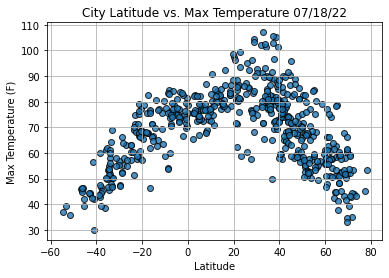

In [24]:
#Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

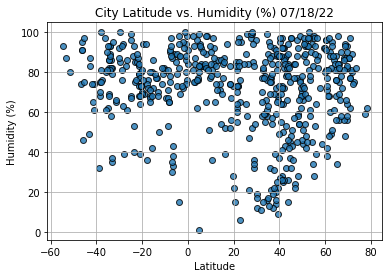

In [27]:
#Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

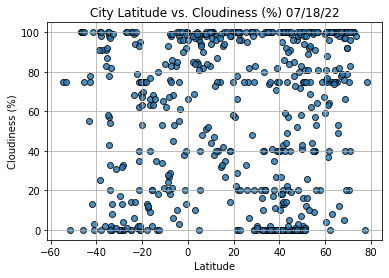

In [28]:
#Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

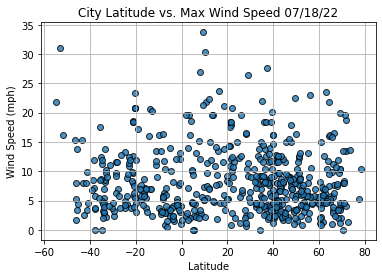

In [29]:
#Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()